In [ ]:
from huggingface_hub import login
login(token=HF_TOKEN)

In [ ]:
from datasets import get_dataset_config_names
xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME has {len(xtreme_subsets)} configurations")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

XTREME has 183 configurations


In [ ]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

In [ ]:
from datasets import load_dataset
load_dataset("xtreme" , name="PAN-X.de")

PAN-X.de/train-00000-of-00001.parquet:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

PAN-X.de/validation-00000-of-00001.parqu(…):   0%|          | 0.00/590k [00:00<?, ?B/s]

PAN-X.de/test-00000-of-00001.parquet:   0%|          | 0.00/588k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [ ]:
from collections import defaultdict
from datasets import DatasetDict

langs = ["de", "fr" , "it" , "en"]
fracs = [0.629 , 0.229 , 0.084 , 0.059]

panx_ch = defaultdict(DatasetDict)
for lang , frac in zip(langs , fracs):
  ds = load_dataset("xtreme" , name=f"PAN-X.{lang}")
  for split in ds:
    panx_ch[lang][split] = ds[split].shuffle(seed=0).select(range(int(frac*ds[split].num_rows)))

PAN-X.fr/train-00000-of-00001.parquet:   0%|          | 0.00/837k [00:00<?, ?B/s]

PAN-X.fr/validation-00000-of-00001.parqu(…):   0%|          | 0.00/419k [00:00<?, ?B/s]

PAN-X.fr/test-00000-of-00001.parquet:   0%|          | 0.00/423k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

PAN-X.it/train-00000-of-00001.parquet:   0%|          | 0.00/932k [00:00<?, ?B/s]

PAN-X.it/validation-00000-of-00001.parqu(…):   0%|          | 0.00/459k [00:00<?, ?B/s]

PAN-X.it/test-00000-of-00001.parquet:   0%|          | 0.00/464k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

PAN-X.en/train-00000-of-00001.parquet:   0%|          | 0.00/942k [00:00<?, ?B/s]

PAN-X.en/validation-00000-of-00001.parqu(…):   0%|          | 0.00/472k [00:00<?, ?B/s]

PAN-X.en/test-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs},
             index=["Number of trainig examples"])

,de,fr,it,en
Number of trainig examples,12580,4580,1680,1180


In [ ]:
element = panx_ch["de"]["train"][0]
for key , value in element.items():
  print(f"{key}: {value}")

tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [ ]:
for key , value in panx_ch["de"]["train"].features.items():
  print(f"{key}: {value}")


tokens: List(Value('string'))
ner_tags: List(ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']))
langs: List(Value('string'))


In [ ]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature

In [ ]:
print(tags)

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'])


In [ ]:
def create_tag_names(batch):
  return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

panx_de = panx_ch["de"].map(create_tag_names)

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [ ]:
de_example = panx_de["train"][0]

In [ ]:
de_example

{'tokens': ['2.000',
  'Einwohnern',
  'an',
  'der',
  'Danziger',
  'Bucht',
  'in',
  'der',
  'polnischen',
  'Woiwodschaft',
  'Pommern',
  '.'],
 'ner_tags': [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0],
 'langs': ['de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de'],
 'ner_tags_str': ['O',
  'O',
  'O',
  'O',
  'B-LOC',
  'I-LOC',
  'O',
  'O',
  'B-LOC',
  'B-LOC',
  'I-LOC',
  'O']}

In [ ]:
pd.DataFrame([de_example["tokens"] , de_example["ner_tags_str"]],['Tokens' , 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [ ]:
from collections import Counter
split2freqs = defaultdict(Counter)
for split , dataset in panx_de.items():
  for row in dataset["ner_tags_str"]:
    for tag in row:
      if tag.startswith("B"):
        tag_type = tag.split("-")[1]
        split2freqs[split][tag_type] +=1
pd.DataFrame.from_dict(split2freqs , orient="index")

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


## TOKENIZATION

In [ ]:
from transformers import AutoTokenizer

bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"

bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
text = "Jack Sparrow loves New York!"
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

In [ ]:
bert_tokens

['[CLS]', 'Jack', 'Spa', '##rrow', 'loves', 'New', 'York', '!', '[SEP]']

In [ ]:
xlmr_tokens

['<s>', '▁Jack', '▁Spar', 'row', '▁love', 's', '▁New', '▁York', '!', '</s>']

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
  config_class = XLMRobertaConfig
  def __init__(self , config):
    super().__init__(config)
    self.num_labels = config.num_labels
    self.roberta = RobertaModel(config , add_pooling_layer=False)
    self.dropout = nn.Dropout(config.hidden_dropout_prob)
    self.classifier = nn.Linear(config.hidden_size , config.num_labels)
    self.init_weights()

  def forward(self , input_ids=None , attention_mask=None , token_type_ids=None, labels=None , num_items_in_batch=None , **kwargs):
    outputs = self.roberta(input_ids , attention_mask=attention_mask , token_type_ids = token_type_ids , **kwargs)
    sequence_output = self.dropout(outputs[0])
    logits = self.classifier(sequence_output)
    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1 , self.num_labels) , labels.view(-1))
    return TokenClassifierOutput(loss=loss , logits=logits , hidden_states=outputs.hidden_states , attentions=outputs.attentions)

In [ ]:
index2tag = {idx: tag for idx , tag in enumerate(tags.names)}
tag2index = {tag: idx for idx , tag in enumerate(tags.names)}

In [ ]:
from transformers import AutoConfig
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name ,
                                         num_labels=tags.num_classes ,
                                         id2label=index2tag ,
                                         label2id=tag2index)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlmr_model = XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name , config=xlmr_config).to(device)

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_ids = xlmr_tokenizer.encode(text , return_tensors="pt")
pd.DataFrame([xlmr_tokens , input_ids[0].numpy()] , index=["Tokens" , "Input IDs"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Input IDs,0,21763,37456,15555,5161,7,2356,5753,38,2


In [ ]:
outputs = xlmr_model(input_ids.to(device)).logits
predictions = torch.argmax(outputs , dim=-1)
print(f"Number of tokens in sequence: {len(xlmr_tokens)}")
print(f"Shape of outputs: {outputs.shape}")

Number of tokens in sequence: 10
Shape of outputs: torch.Size([1, 10, 7])


In [ ]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens , preds] , index=["Tokens" , "Tags"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC


In [ ]:
def tag_text(text , tags , model , tokenizer):
  tokens = tokenizer(text).tokens()
  input_ids = xlmr_tokenizer(text , return_tensors="pt").input_ids.to(device)
  outputs = model(input_ids).logits
  predictions = torch.argmax(outputs , dim=-1)
  preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
  return pd.DataFrame([tokens , preds], index=["Tokens" , "Tags"])

In [ ]:
words , labels = de_example["tokens"] , de_example["ner_tags"]

In [ ]:
words

['2.000',
 'Einwohnern',
 'an',
 'der',
 'Danziger',
 'Bucht',
 'in',
 'der',
 'polnischen',
 'Woiwodschaft',
 'Pommern',
 '.']

In [ ]:
labels

[0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]

In [ ]:
tokenized_input = xlmr_tokenizer(words , is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
pd.DataFrame([tokens] , index=["Tokens"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [ ]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens , word_ids] , index=["Tokens" , "Word IDs"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [ ]:
word_ids

[None,
 0,
 1,
 1,
 2,
 3,
 4,
 4,
 4,
 5,
 5,
 6,
 7,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 None]

In [ ]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
  if word_idx is None or word_idx == previous_word_idx:
    label_ids.append(-100)
  elif word_idx != previous_word_idx:
    label_ids.append(labels[word_idx])
  previous_word_idx = word_idx

labels = [index2tag[l] if l!=-100 else "IGN" for l in label_ids]
index = ["Tokens" , "Word IDs" , "Label IDs" , "Labels"]

pd.DataFrame([tokens , word_ids , label_ids , labels] , index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [ ]:
def tokenize_and_align_labels(examples):
  tokenized_inputs = xlmr_tokenizer(examples["tokens"] , truncation=True , is_split_into_words=True)
  labels = []

  for idx , label in enumerate(examples["ner_tags"]):
    word_ids = tokenized_inputs.word_ids(batch_index=idx)
    previous_word_idx = None
    label_ids = []
    for word_idx in word_ids:
      if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
      else:
        label_ids.append(label[word_idx])
      previous_word_idx = word_idx
    labels.append(label_ids)
  tokenized_inputs["labels"] = labels
  return tokenized_inputs

In [ ]:
def encode_panx_dataset(corpus):
  return corpus.map(tokenize_and_align_labels , batched=True , remove_columns=["langs" , "ner_tags" , "tokens"])

In [ ]:
panx_de_encoded = encode_panx_dataset(panx_ch['de'])

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [ ]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=d763f1b04e456945cba13da3e5fe875ad59048e27d295ddeeec37c24a2f1adb4
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [ ]:
from seqeval.metrics import classification_report
y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"],
["B-PER", "I-PER", "O"]]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [ ]:
import numpy as np

def align_prediction(predictions , label_ids):
  preds = np.argmax(predictions , axis=2)
  batch_size , seq_len = preds.shape
  labels_list , preds_list = [] , []

  for batch_idx in range(batch_size):
    example_labels , example_preds = [],[]
    for seq_idx in range(seq_len):
      if label_ids[batch_idx , seq_idx] != -100:
        example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
        example_preds.append(index2tag[preds[batch_idx][seq_idx]])

    labels_list.append(example_labels)
    preds_list.append(example_preds)
  return preds_list , labels_list


TRAINING OF THE XLMR ROBERTA MODEL

In [ ]:
from transformers import TrainingArguments

num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded["train"])
model_name = f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(output_dir=model_name ,
                                  num_train_epochs=num_epochs,
                                  log_level="error",
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  eval_strategy="epoch",
                                  save_steps=1e6, weight_decay=0.01,
                                  disable_tqdm=False , logging_steps=logging_steps,
                                  push_to_hub=False,
                                  report_to="none")

In [ ]:
from seqeval.metrics import f1_score
def compute_metrics(eval_pred):
  y_pred , y_true = align_prediction(eval_pred.predictions , eval_pred.label_ids)
  return {"f1": f1_score(y_true , y_pred)}

In [ ]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(tokenizer=xlmr_tokenizer)

In [ ]:
def model_init():
  return (XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name , config=xlmr_config)).to(device)

In [ ]:
from transformers import Trainer
trainer = Trainer(model_init=model_init , args=training_args,
                  data_collator=data_collator ,
                  compute_metrics=compute_metrics,
                  train_dataset=panx_de_encoded["train"],
                  eval_dataset=panx_de_encoded["validation"],
                  tokenizer=xlmr_tokenizer)

/tmp/ipython-input-1404621962.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init , args=training_args,


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,No log,0.165416,0.814673
2,No log,0.138179,0.849989
3,No log,0.138723,0.861427


TrainOutput(global_step=1575, training_loss=0.15404393756200396, metrics={'train_runtime': 653.6464, 'train_samples_per_second': 57.738, 'train_steps_per_second': 2.41, 'total_flos': 862324400720376.0, 'train_loss': 0.15404393756200396, 'epoch': 3.0})

In [ ]:
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  features = [dict(zip(batch ,t)) for t in zip(*batch.values())]
  batch = data_collator(features)
  input_ids = batch["input_ids"].to(device)
  attention_mask = batch["attention_mask"].to(device)
  labels = batch["labels"].to(device)
  with torch.no_grad():
    output = trainer.model(input_ids , attention_mask)
    predicted_label = torch.argmax(output.logits , axis=-1).cpu().numpy()

  loss = cross_entropy(output.logits.view(-1 , 7),labels.view(-1) , reduction="none")
  loss = loss.view(len(input_ids) , -1).cpu().numpy()

  return {"loss": loss , "predicted_label" : predicted_label}

In [ ]:
valid_set = panx_de_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [ ]:
index2tag[-100] = "IGN"
df["input_tokens"] = df['input_ids'].apply(
    lambda x: xlmr_tokenizer.convert_ids_to_tokens(x)
)
df["predicted_label"] = df["predicted_label"].apply(lambda x: [index2tag[i] for i in x])
df["labels"] = df["labels"].apply(lambda x: [index2tag[i] for i in x])
df["loss"] = df.apply(
    lambda x: x['loss'][:len(x['input_ids'])] , axis=1
)
df["predicted_label"] = df.apply(lambda x: x['predicted_label'][:len(x['input_ids'])]
                                 , axis=1)

In [ ]:
# Inspect unique values in the 'predicted_label' column before mapping
unique_predicted_labels = df['predicted_label'].explode().unique()
print("Unique values in 'predicted_label' before mapping:", unique_predicted_labels)

Unique values in 'predicted_label' before mapping: ['I-ORG' 'B-ORG' 'O' 'B-PER' 'I-PER' 'B-LOC' 'I-LOC']


In [ ]:
df.head(1)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.014199061, 0.0, 0.007924309, 0.0074196...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


In [ ]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens['loss'] = df_tokens["loss"].astype(float).round(2)
df_tokens.head(7)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,10699,1,B-ORG,0.01,B-ORG,▁Ham
0,15,1,I-ORG,0.01,I-ORG,▁(
0,16104,1,I-ORG,0.01,I-ORG,▁Unternehmen
0,1388,1,I-ORG,0.01,I-ORG,▁)
1,56530,1,O,0.00,O,▁WE
1,83982,1,B-ORG,2.10,B-PER,▁Luz
1,10,1,I-ORG,2.01,I-PER,▁a


In [ ]:
df_tokens.groupby("input_tokens")[["loss"]].agg(["count","sum"]).droplevel(level=0 , axis=1).sort_values(by="count" , ascending=False).reset_index().round(2).head(10)

,input_tokens,count,sum
0,▁,6066,196.20
1,▁'',2898,65.91
2,▁',2133,37.40
3,▁der,1388,130.16
4,▁und,1171,92.40
5,▁in,989,144.77
6,▁die,860,51.37
7,▁von,808,106.02
8,▁er,707,0.01
9,▁den,489,15.93


In [ ]:
df_tokens.groupby("labels")[["loss"]].agg(["count", "mean", "sum"]).droplevel(level=0, axis=1).sort_values(by="mean", ascending=False).reset_index().round(2).T


,0,1,2,3,4,5,6
labels,I-LOC,B-ORG,I-ORG,B-LOC,B-PER,I-PER,O
count,1462,2683,3820,3172,2893,4139,43648
mean,0.63,0.61,0.49,0.33,0.28,0.2,0.03
sum,918.53,1632.11,1890.36,1061.28,811.42,812.9,1390.11


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix

In [ ]:
import matplotlib.pyplot as plt

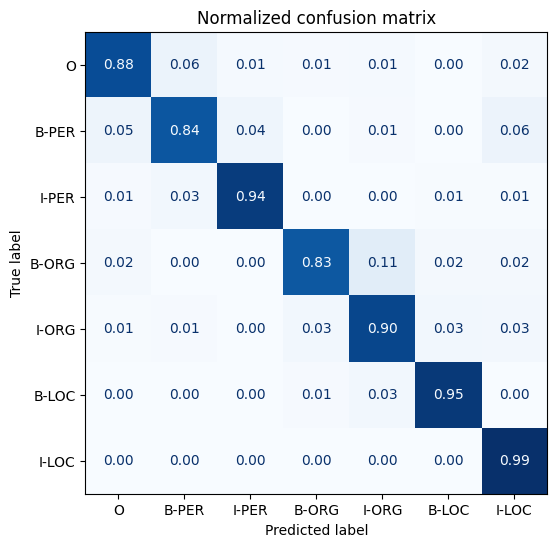

In [ ]:
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()
plot_confusion_matrix(df_tokens["labels"], df_tokens["predicted_label"],
  tags.names)

In [ ]:
def get_samples(df):
  for _, row in df.iterrows():
    labels, preds, tokens, losses = [], [], [], []
    for i, mask in enumerate(row["attention_mask"]):
      if i not in {0, len(row["attention_mask"])}:
          labels.append(row["labels"][i])
          preds.append(row["predicted_label"][i])
          tokens.append(row["input_tokens"][i])
          losses.append(f"{row['loss'][i]:.2f}")
    df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels,
  "preds": preds, "losses": losses}).T
  yield df_tmp
df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3)
for sample in get_samples(df_tmp):
  display(sample)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,6.88,7.01,7.04,0.00,7.13,0.00,6.84,0.00,6.63,6.27,6.28,6.30,6.49,6.26,0.00


In [ ]:
df_tmp = df.loc[df["input_tokens"].apply(lambda x: u"\u2581(" in x)].head(2)
for sample in get_samples(df_tmp):
  display(sample)

,0,1,2,3,4,5,6,7
tokens,▁Kesk,kül,a,▁(,▁Mart,na,▁),</s>
labels,B-LOC,IGN,IGN,I-LOC,I-LOC,IGN,I-LOC,IGN
preds,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC
losses,0.03,0.00,0.00,0.02,0.01,0.00,0.01,0.00


In [ ]:
def get_f1_score(trainer , dataset):
  return trainer.predict(dataset).metrics["test_f1"]

In [ ]:
f1_scores = defaultdict(dict)
f1_scores['de']['de'] = get_f1_score(trainer , panx_de_encoded["test"])
print(f"F1-score of [de] on [de] dataset:{f1_scores['de']['de']: .3f}")

F1-score of [de] on [de] dataset: 0.869


In [ ]:
text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [ ]:
def evaluate_lang_performance(lang , trainer):
  panx_ds = encode_panx_dataset(panx_ch[lang])
  return get_f1_score(trainer , panx_ds["test"])

f1_scores["de"]["fr"] = evaluate_lang_performance("fr" , trainer)
print(f"F1-score of [de] on [fr] dataset:{f1_scores['de']['fr']: .3f}")

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

F1-score of [de] on [fr] dataset: 0.703


In [ ]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

F1-score of [de] model on [en] dataset: 0.602


In [ ]:
def train_on_subset(dataset, num_samples):
  train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
  valid_ds = dataset["validation"]
  test_ds = dataset["test"]
  training_args.logging_steps = len(train_ds)
  trainer = Trainer(model_init=model_init, args=training_args,
  data_collator=data_collator, compute_metrics=compute_metrics,
  train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
  trainer.train()
  if training_args.push_to_hub:
    trainer.push_to_hub(commit_message="Training completed!")
  f1_score = get_f1_score(trainer, test_ds)
  return pd.DataFrame.from_dict(
  {"num_samples": [len(train_ds)], "f1_score": [f1_score]})

In [ ]:
panx_fr_encoded = encode_panx_dataset(panx_ch['fr'])

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

In [ ]:
training_args.push_to_hub = False
metrics_df = train_on_subset(panx_fr_encoded , 250)
metrics_df

/tmp/ipython-input-713205108.py:6: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,No log,1.286207,0.007265
2,No log,0.952014,0.270902
3,No log,0.874260,0.402640


,num_samples,f1_score
0,250,0.401373


In [ ]:
for num_samples in [500 , 1000 , 2000 , 4000]:
  metrics_df = pd.concat(
      [metrics_df, train_on_subset(panx_fr_encoded , num_samples)] , ignore_index=True)

/tmp/ipython-input-713205108.py:6: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,No log,0.999947,0.340293
2,No log,0.646698,0.561382
3,No log,0.546617,0.644409


/tmp/ipython-input-713205108.py:6: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,No log,0.528801,0.698681
2,No log,0.434182,0.693590
3,No log,0.388353,0.756082


/tmp/ipython-input-713205108.py:6: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,No log,0.382053,0.732905
2,No log,0.333056,0.783444
3,No log,0.327923,0.813876


/tmp/ipython-input-713205108.py:6: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,No log,0.363607,0.769384
2,No log,0.310552,0.826618


Epoch,Training Loss,Validation Loss,F1
1,No log,0.363607,0.769384
2,No log,0.310552,0.826618
3,No log,0.278719,0.830882


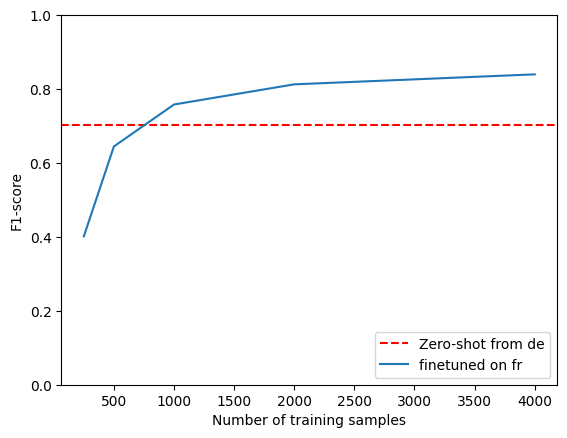

In [ ]:
fig , ax = plt.subplots()
ax.axhline(f1_scores['de']['fr'] , color="red" , linestyle="--")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de" , "finetuned on fr"], loc="lower right")
plt.ylim((0,1))
plt.xlabel("Number of training samples")
plt.ylabel("F1-score")
plt.show()